## Observations and Insights 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

combine_data = pd.merge(mouse_metadata,study_results,on='Mouse ID')
combine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
study_mean = combine_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
study_median = combine_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
study_variance = combine_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
study_standard_deviation = combine_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
study_sem = combine_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_mean_df = pd.DataFrame(study_mean)
summary_comp = summary_mean_df.rename(columns={"Tumor Volume (mm3)": "Mean"})

summary_comp.assign(Median=study_median,Variance=study_variance,Standard_deviation=study_standard_deviation,SEM=study_sem)


,Mean,Median,Variance,Standard_deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Number of Total Mice')

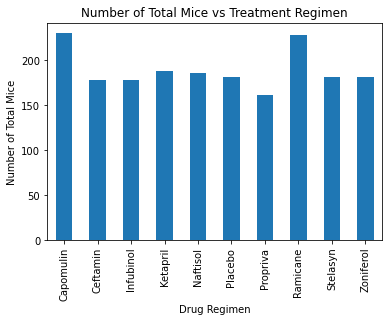

In [7]:
barplot_datagroupby = combine_data.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
bar_plot_data = barplot_datagroupby.plot.bar(rot='vertical',title='Number of Total Mice vs Treatment Regimen')

bar_plot_data.set_xlabel("Drug Regimen")
bar_plot_data.set_ylabel("Number of Total Mice")


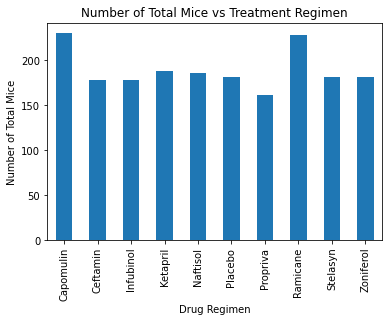

In [9]:
barplot_datagroupby2 = combine_data.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
bar_plot_data2 = pd.DataFrame(barplot_datagroupby2)

plt.xdata = bar_plot_data2.plot.bar(legend=False)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Total Mice')
plt.title('Number of Total Mice vs Treatment Regimen')

plt.show()


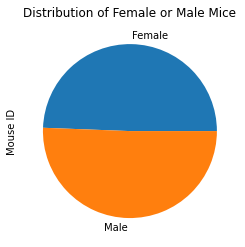

In [10]:
gender_data = combine_data.groupby('Sex').count()['Mouse ID']

pie_plot = gender_data.plot.pie(y='Sex',title='Distribution of Female or Male Mice')

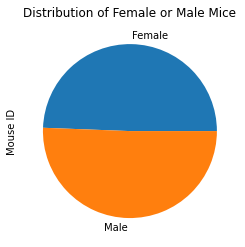

In [11]:
gender_data2 = combine_data.groupby('Sex').count()['Mouse ID']
gender_df = pd.DataFrame(gender_data2)
gender_df 

plt.pie(gender_data2,labels=gender_data2.index);
plt.title('Distribution of Female or Male Mice')
plt.ylabel('Mouse ID')
plt.show()

In [13]:

cap_df = combine_data.loc[combine_ms["Drug Regimen"] == "Capomulin",:]
ram_df = combine_data.loc[combine_ms["Drug Regimen"] == "Ramicane", :]
infu_df = combine_data.loc[combine_ms["Drug Regimen"] == "Infubinol", :]
ceft_df = combine_data.loc[combine_ms["Drug Regimen"] == "Ceftamin", :]

In [15]:
cap_max = cap_df.groupby('Mouse ID').max()['Timepoint']
cap_max_df = pd.DataFrame(cap_max)
cap_max_merge = pd.merge(cap_max_df,combine_ms,on=("Mouse ID","Timepoint"),how="left")
cap_max_merge.head()

ram_max = ram_df.groupby('Mouse ID').max()['Timepoint']
ram_max_df = pd.DataFrame(ram_max)
ram_max_merge = pd.merge(ram_max_df,combine_ms,on=("Mouse ID","Timepoint"),how="left")
ram_max_merge.head()

infu_max = infu_df.groupby('Mouse ID').max()['Timepoint']
infu_max_df = pd.DataFrame(infu_max)
infu_max_merge = pd.merge(infu_max_df,combine_ms,on=("Mouse ID","Timepoint"),how="left")
infu_max_merge.head()

ceft_max = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceft_max_df = pd.DataFrame(ceft_max)
ceft_max_merge = pd.merge(ceft_max_df,combine_ms,on=("Mouse ID","Timepoint"),how="left")
ceft_max_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [16]:

cap_tumors = cap_max_merge["Tumor Volume (mm3)"]

cap_quartiles = cap_tumors.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_innerq = cap_upperq-cap_lowerq

cap_lower_bound = cap_lowerq - (1.5*cap_innerq)
cap_lower_bound = cap_upperq + (1.5*cap_innerq)
print(f"Capomulin potential outliers could be values below {cap_lower_bound} and above {cap_lower_bound} could be outliers.")

ram_tumors = ram_max_merge["Tumor Volume (mm3)"]

ram_quartiles = ram_tumors.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_innerq = ram_upperq-ram_lowerq

ram_lower_bound = ram_lowerq - (1.5*ram_innerq)
ram_upper_bound = ram_upperq + (1.5*ram_innerq)
print(f"Ramicane potential outliers could be values below {ram_lower_bound} and above {ram_upper_bound} could be outliers.")

infu_tumors = infu_max_merge["Tumor Volume (mm3)"]

_infu_quartiles = infu_tumors.quantile([.25,.5,.75])
_infu_lowerq = _infu_quartiles[0.25]
infu_upperq = _infu_quartiles[0.75]
infu_innerq = infu_upperq-_infu_lowerq

infu_lower_bound = _infu_lowerq - (1.5*infu_innerq)
infu_upper_bound = infu_upperq + (1.5*infu_innerq)
print(f"Infubinol potential outliers could be values below {infu_lower_bound} and above {infu_upper_bound} could be outliers.")

ceft_tumors = ceft_max_merge["Tumor Volume (mm3)"]

ceft_quartiles = ceft_tumors.quantile([.25,.5,.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_innerq = ceft_upperq-ceft_lowerq

ceft_lower_bound = ceft_lowerq - (1.5*ceft_innerq)
cef_upper_bound = ceft_upperq + (1.5*ceft_innerq)
print(f"Ceftamin potential outliers could be values below {ceft_lower_bound} and above {cef_upper_bound} could be outliers.")


Capomulin potential outliers could be values below 51.83201549 and above 51.83201549 could be outliers.
Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.
Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


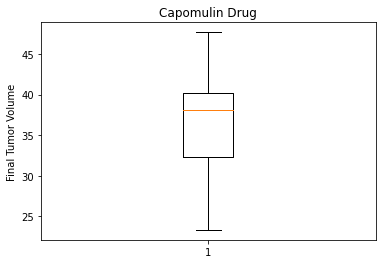

In [17]:
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Drug')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(cap_tumors)
plt.show()


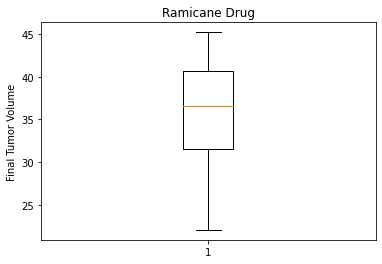

In [18]:
 fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane Drug')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(ram_tumors)
plt.show()

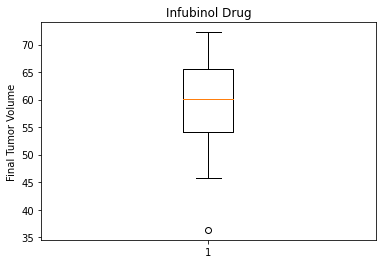

In [19]:
fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol Drug')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(infu_tumors)
plt.show()


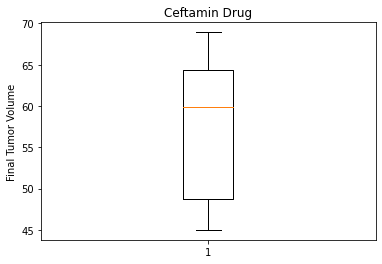

In [20]:
fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin Drug')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(ceft_tumors)
plt.show()